# Generate 2d Computational Space (Occupancy Grid)

In [308]:
import numpy as np

def add_obstacle(occupancy_grid, width, length, x, y):
    width_occ = len(occupancy_grid[0])
    height_occ = len(occupancy_grid)

    start_row = y
    end_row = min(height_occ, y + length)
    start_col = x
    end_col = min(width_occ, x + width)

    for row in range(start_row, end_row):
        for col in range(start_col, end_col):
            occupancy_grid[row][col] = False

    return occupancy_grid

def generate_occupancy_grid():
    size = 5
    occupancy_grid = np.ones((size, size), dtype=bool)

    # Add obstacles for 2d computational space
    occupancy_grid = add_obstacle(occupancy_grid, 3, 1, 1, 1)
    occupancy_grid = add_obstacle(occupancy_grid, 2, 1, 2, 3)
    #occupancy_grid = add_obstacle(occupancy_grid, 5, 2, 7, 14)
    #occupancy_grid = add_obstacle(occupancy_grid, 4, 3, 12, 4)
    #occupancy_grid = add_obstacle(occupancy_grid, 4, 2, 15, 10)

    return occupancy_grid

In [148]:
def calculate_computational_space_rotated_180(occupancy_grid, robot_width, robot_length):
    width = len(occupancy_grid[0])
    height = len(occupancy_grid)

    computational_space = [[True for _ in range(width)] for _ in range(height)]

    for row in range(height):
        for col in range(width):
            if not occupancy_grid[row][col]:
                # Koordinaten im quadratischen Bereich um das Hindernis auf False setzen
                start_row = row
                end_row = min(height, row + robot_length)
                start_col = max(0, col - robot_width + 1)
                end_col = min(width, col + 1)

                for i in range(start_row, end_row):
                    for j in range(start_col, end_col):
                        computational_space[i][j] = False

    # Alle Zeilen bis robot_length - 1 auf False setzen
    for row in range(robot_length - 1):
        for col in range(width):
            computational_space[row][col] = False

    # Alle Spalten bis width-robot_width auf False setzen
    for col in range(width - robot_width + 1, width):
        for row in range(height):
            computational_space[row][col] = False

    return computational_space


# Beispielaufruf
occupancy_grid = [
    [True, True, True, True, True],
    [True, False, True, True, True],
    [True, True, True, True, True],
    [True, True, True, False, True],
    [True, True, True, True, True]
]

robot_width = 2
robot_length = 3

computational_space_rotated_180 = calculate_computational_space_rotated_180(occupancy_grid, robot_width, robot_length)

# Ausgabe des berechneten Computational Space für die Drehung um 180°
for row in computational_space_rotated_180:
    print(row)


1 1
range(1, 4)
range(0, 2)
3 3
range(3, 5)
range(2, 4)
[False, False, False, False, False]
[False, False, False, False, False]
[False, False, True, True, False]
[False, False, False, False, False]
[True, True, False, False, False]


# Compute Computational Space for Robot Rotations

In [336]:
def compute_cs_0deg(occupancy_grid, robot_width, robot_length):
    height = len(occupancy_grid)
    width = len(occupancy_grid[0])

    computational_space = np.full((height, width), True)

    for row in range(height):
        for col in range(width):
            if not occupancy_grid[row][col]:
                # Koordinaten im quadratischen Bereich um das Hindernis auf False setzen
                start_row = max(0, row - (robot_length - 1))
                end_row = min(height, row + 1)
                start_col = max(0, col - (robot_width - 1))
                end_col = min(width, col + 1)

                for i in range(start_row, end_row):
                    for j in range(start_col, end_col):
                        computational_space[i][j] = False

    # Alle Zeilen bis height-robot_length auf False setzen
    for row in range(height - robot_length + 1, height):
        for col in range(width):
            computational_space[row][col] = False

    # Alle Spalten bis width-robot_width auf False setzen
    for col in range(width - robot_width + 1, width):
        for row in range(height):
            computational_space[row][col] = False

    return computational_space


def compute_cs_90deg(occupancy_grid, robot_width, robot_length):
    height = len(occupancy_grid)
    width = len(occupancy_grid[0])

    computational_space = np.full((height, width), True)

    for row in range(height):
        for col in range(width):
            if not occupancy_grid[row][col]:
                # Koordinaten im quadratischen Bereich um das Hindernis auf False setzen
                start_row = row
                end_row = min(height, row + robot_width)
                start_col = max(0, col - robot_length + 1)
                end_col = min(width, col + 1)

                for i in range(start_row, end_row):
                    for j in range(start_col, end_col):
                        computational_space[i][j] = False

    # Alle oberen (robot_width-1) Zeilen auf False setzen
    for row in range(robot_width - 1):
        for col in range(width):
            computational_space[row][col] = False

    # Alle rechten (robot_length-1) Spalten auf False setzen
    for col in range((width - robot_length + 1), width):
        for row in range(height):
            computational_space[row][col] = False

    return computational_space


def compute_cs_180deg(occupancy_grid, robot_width, robot_length):
    width = len(occupancy_grid[0])
    height = len(occupancy_grid)

    computational_space = np.full((height, width), True)

    for row in range(height):
        for col in range(width):
            if not occupancy_grid[row][col]:
                # Koordinaten im quadratischen Bereich um das Hindernis auf False setzen
                start_row = row
                end_row = min(height, row + robot_length)
                start_col = col
                end_col = min(width, col + robot_width)

                for i in range(start_row, end_row):
                    for j in range(start_col, end_col):
                        computational_space[i][j] = False

    # Alle oberen (robot_length-1) Zeilen auf False setzen
    for row in range(robot_length - 1):
        for col in range(width):
            computational_space[row][col] = False

    # Alle linken (robot_width-1) Spalten auf False setzen
    for col in range(robot_width - 1):
        for row in range(height):
            computational_space[row][col] = False

    return computational_space



def compute_cs_270deg(occupancy_grid, robot_width, robot_length):
       height = len(occupancy_grid)
    width = len(occupancy_grid[0])

    computational_space = np.full((height, width), True)

    for row in range(height):
        for col in range(width):
            if not occupancy_grid[row][col]:
                # Koordinaten im quadratischen Bereich um das Hindernis auf False setzen
                start_row = max(0, row - robot_width + 1)
                end_row = min(height, row + 1)
                start_col = col
                end_col = min(width, col + robot_length)

                for i in range(start_row, end_row):
                    for j in range(start_col, end_col):
                        computational_space[i][j] = False

    # Alle unteren (robot_width-1) Zeilen auf False setzen
    for row in range((height - robot_width + 1), height):
        for col in range(width):
            computational_space[row][col] = False

    # Alle linken (robot_length-1) Spalten auf False setzen
    for col in range(robot_length - 1):
        for row in range(height):
            computational_space[row][col] = False

    return computational_space



# Compute Potentials

In [316]:
import numpy as np

def compute_potential_field(cs_plane, goal, attraction_weight=0.07, repulsion_weight=0):
    size_x = cs_plane.shape[0]
    size_y = cs_plane.shape[1]
    attraction_potential = np.zeros((size_x, size_y))
    repulsion_potential = np.zeros((size_x, size_y))

    for x in range(size_x):
        for y in range(size_y):
            # Abstand zum Ziel
            distance_to_goal = np.sqrt((x - goal[0])**2 + (y - goal[1])**2)

            # Anziehendes Potential zum Ziel (Quadratische Funktion)
            attraction_potential[y, x] = attraction_weight * distance_to_goal**2
            #attraction_potential[y, x] = distance_to_goal

            #max_value = np.max(attraction_potential)
            normalized_attraction_potential = attraction_potential #/ max_value


            # Abstand zu Hindernissen
            distance_to_obstacles = np.min(np.sqrt((y - np.where(cs_plane == False)[0])**2 +
                                                   (x - np.where(cs_plane == False)[1])**2))

            # Abstoßendes Potential von Hindernissen
            repulsion_potential[y, x] = 1 / (repulsion_weight + distance_to_obstacles) if distance_to_obstacles > 0 else 2

    return normalized_attraction_potential, repulsion_potential

def compute_total_potential(attraction_potential, repulsion_potential):
    total_potential = attraction_potential + repulsion_potential
    return total_potential

# Gradient Descent Step

In [ ]:
import numpy as np

def lowest_pot_in_neighbourhood(total_potential_plane, current_position):

    # TODO: Implement obstacle detection
    # TODO: Implement border clipping

    # Berechne das Gesamtpotential in den umliegenden 4 Positionen
    neighbors_potentials = [
        total_potential_plane[current_position[0] + 1, current_position[1]], # neighbours_potentials[0] = right neighbour
        total_potential_plane[current_position[0] - 1, current_position[1]], # neighbours_potentials[1] = left neighbour
        total_potential_plane[current_position[0], current_position[1] + 1], # neighbours_potentials[2] = top neighbour
        total_potential_plane[current_position[0], current_position[1] - 1]  # neighbours_potentials[3] = bottom neighbour
    ]

    # Finde die Position mit dem kleinsten Gesamtpotential
    lowest_pot_in_neighbourhood = np.min(neighbors_potentials)
    lowest_pot_neighbour_index = np.argmin(neighbors_potentials)

    # Berechne die nächste Position
    lowest_pot_neighbour_position = np.array(current_position)
    if lowest_pot_neighbour_index == 0: 
        lowest_pot_neighbour_position[0] += 1
    elif lowest_pot_neighbour_index == 1:
        lowest_pot_neighbour_position[0] -= 1
    elif lowest_pot_neighbour_index == 2:
        lowest_pot_neighbour_position[1] += 1
    elif lowest_pot_neighbour_index == 3:
        lowest_pot_neighbour_position[1] -= 1

    # Begrenze die Position innerhalb der Grenzen des Potentialfelds
    # lowest_pot_neighbour_position = np.clip(lowest_pot_neighbour_position, 0, np.array(total_potential_plane.shape) - 1)

    return lowest_pot_in_neighbourhood, lowest_pot_neighbour_position


def gradient_descent_step(total_potentials, current_position):

    # [total_potential_0deg, total_potential_90deg, total_potential_180deg, total_potential_270deg] = total_potentials

    new_current_position = current_position

    current_x, current_y, current_rotation = current_position
    total_potential_plane_current_rotation = total_potentials[current_rotation]

    # Get lowest potential when translating (current rotation plane only)
    lowest_pot_in_neighbourhood, lowest_pot_neighbour_position = lowest_pot_in_neighbourhood(total_potential_plane_current_rotation)

    # Get potentials when rotating (switching planes, no translation)
    reachable_rotation_counter_clockwise = (current_position[3] + 1) % 4
    reachable_rotation_clockwise = (current_position[3] + 3) % 4
    # Counter clockwise rotation:
    total_potential_plane_rotation_counter_clockwise = total_potentials[reachable_rotation_counter_clockwise]
    pot_rotation_counter_counter_clockwise = total_potential_plane_rotation_counter_clockwise[current_x][current_y]
    # Clockwise rotation:
    total_potential_plane_rotation_clockwise = total_potentials[reachable_rotation_clockwise]
    pot_rotation_counter_clockwise = total_potential_plane_rotation_clockwise[current_x][current_y]

   
    if lowest_pot_in_neighbourhood < pot_rotation_counter_clockwise and lowest_pot_in_neighbourhood < pot_rotation_counter_counter_clockwise:
        # Lowest potential in current location
        new_current_position = lowest_pot_neighbour_position
    else: # lowest potential when rotating
        if pot_rotation_counter_clockwise < pot_rotation_counter_counter_clockwise:
            new_current_position[3] = pot_rotation_counter_clockwise
        else:
            new_current_position[3] = reachable_rotation_clockwise

    return new_current_position


# Plot 2D Occupancy Grid

In [339]:
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

def plot_2d_occupancy_grid(cs_2d, start_point, goal_point, path, current_position, robot_width, robot_length, cs_2d_plot_axis):
    cs_2d_plot_axis.clear()

    current_x, current_y, current_rotation = current_position

    cs_2d_plot_axis.imshow(cs_2d, cmap='Blues', interpolation='nearest', origin='upper')
    cs_2d_plot_axis.scatter(start_point[0], start_point[1], color='green', marker='o', label='Start Point')
    cs_2d_plot_axis.scatter(goal_point[0], goal_point[1], color='red', marker='o', label='Goal Point')
    cs_2d_plot_axis.plot([p[0] for p in path], [p[1] for p in path], color='blue', label='Chosen Path')

    # Darstellung des aktuellen Roboters als Rechteck
    current_rect = plt.Rectangle(
        (current_x - 0.5, current_y - 0.5), 
        robot_width,
        robot_length,
        rotation_point=(current_x, current_y),
        angle=current_rotation * -90,  # Rotation in Grad umrechnen
        color='orange',
        label='Current Position'
    )
    cs_2d_plot_axis.add_patch(current_rect)

    cs_2d_plot_axis.grid(False)
    cs_2d_plot_axis.set_title('Robot Position in 2D Occupancy Grid')

    # Beschriftung der X-Achse oben
    cs_2d_plot_axis.xaxis.tick_top()

    # Legende unter das Bild in die Mitte verschieben
    #cs_2d_plot_axis.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)



# Plot Attraction Potential 3D

In [318]:
import numpy as np

def plot_attraction_potential_3D(attraction_potential_plane, start_point, goal_point, path, current_position, attr_pot_plot_axis):
    # Clear previous plots
    attr_pot_plot_axis.clear()    
    
    # Repulsion Potential as z-axis in 3D Plane
    x, y = np.meshgrid(np.arange(attraction_potential_plane.shape[0]), np.arange(attraction_potential_plane.shape[1]))
    z = attraction_potential_plane
    attr_pot_plot_axis.plot_surface(x, y, z, cmap='viridis', rstride=1, cstride=1, alpha=0.6, linewidth=0.5, antialiased=True)
    
    # Start Point
    attr_pot_start = attraction_potential_plane[start_point[1]][start_point[0]]
    attr_pot_plot_axis.scatter(start_point[0], start_point[1], attr_pot_start, color='green', marker='o', label='Start Point')

    # Goal Point
    attr_pot_goal = attraction_potential_plane[goal_point[1]][goal_point[0]] # + 0.25 # added for better visualization
    attr_pot_plot_axis.scatter(goal_point[0], goal_point[1], attr_pot_goal, color='red', marker='o', label='Goal Point')
    
    # Travelled Path
    attr_pot_plot_axis.plot([p[1] for p in path], [p[0] for p in path], [attraction_potential_plane[p[0], p[1]] for p in path], color='blue', label='Weg')

    # Current Position
    current_x, current_y, current_rotation = current_position
    current_attr_pot = attraction_potential_plane[current_y][current_x]
    attr_pot_plot_axis.scatter(current_position[0], current_position[1], current_attr_pot, color='orange', marker='x', label='Current Position')

    #repul_pot_plot_axis.legend()
    attr_pot_plot_axis.set_xlabel('X')
    attr_pot_plot_axis.set_ylabel('Y')
    attr_pot_plot_axis.set_zlabel('Repulsion Potential')
    attr_pot_plot_axis.set_title('Repulsion Potential for Plane ' + str(current_rotation))
    attr_pot_plot_axis.invert_yaxis()


# Plot Repulsion Potential 3D

In [319]:
import numpy as np

def plot_repulsion_potential_3D(repulsion_potential_plane, start_point, goal_point, path, current_position, repul_pot_plot_axis):
    # Clear previous plots
    repul_pot_plot_axis.clear()    
    
    # Repulsion Potential as z-axis in 3D Plane
    x, y = np.meshgrid(np.arange(repulsion_potential_plane.shape[0]), np.arange(repulsion_potential_plane.shape[1]))
    z = repulsion_potential_plane
    repul_pot_plot_axis.plot_surface(x, y, z, cmap='viridis', rstride=1, cstride=1, alpha=0.6, linewidth=0.5, antialiased=True)
    
    # Start Point
    attr_pot_start = repulsion_potential_plane[start_point[1]][start_point[0]]
    repul_pot_plot_axis.scatter(start_point[0], start_point[1], attr_pot_start, color='green', marker='o', label='Start Point')

    # Goal Point
    attr_pot_goal = repulsion_potential_plane[goal_point[1]][goal_point[0]] # + 0.25 # added for better visualization
    repul_pot_plot_axis.scatter(goal_point[0], goal_point[1], attr_pot_goal, color='red', marker='o', label='Goal Point')
    
    # Travelled Path
    repul_pot_plot_axis.plot([p[1] for p in path], [p[0] for p in path], [repulsion_potential_plane[p[0], p[1]] for p in path], color='blue', label='Weg')

    # Current Position
    current_x, current_y, current_rotation = current_position
    current_attr_pot = repulsion_potential_plane[current_y][current_x]
    repul_pot_plot_axis.scatter(current_position[0], current_position[1], current_attr_pot, color='orange', marker='x', label='Current Position')

    #repul_pot_plot_axis.legend()
    repul_pot_plot_axis.set_xlabel('X')
    repul_pot_plot_axis.set_ylabel('Y')
    repul_pot_plot_axis.set_zlabel('Repulsion Potential')
    repul_pot_plot_axis.set_title('Repulsion Potential for Plane ' + str(current_rotation))
    repul_pot_plot_axis.invert_yaxis()

# Plot Total Potential

In [322]:
import numpy as np

def plot_total_potential_3D(total_potential_plane, start_point, goal_point, path, current_position, total_pot_plot_axis):
    # Clear previous plots
    total_pot_plot_axis.clear()    
    
    # Total Potential as z-axis in 3D Plane
    x, y = np.meshgrid(np.arange(total_potential_plane.shape[0]), np.arange(total_potential_plane.shape[1]))
    z = total_potential_plane
    total_pot_plot_axis.plot_surface(x, y, z, cmap='viridis', rstride=1, cstride=1, alpha=0.6, linewidth=0.5, antialiased=True)
    
    # Start Point
    attr_pot_start = total_potential_plane[start_point[1]][start_point[0]]
    total_pot_plot_axis.scatter(start_point[0], start_point[1], attr_pot_start, color='green', marker='o', label='Start Point')

    # Goal Point
    attr_pot_goal = total_potential_plane[goal_point[1]][goal_point[0]] #+ 0.25 # added for better visualization
    total_pot_plot_axis.scatter(goal_point[0], goal_point[1], attr_pot_goal, color='red', marker='o', label='Goal Point')
    
    # Travelled Path
    total_pot_plot_axis.plot([p[1] for p in path], [p[0] for p in path], [total_potential_plane[p[0], p[1]] for p in path], color='blue', label='Weg')

    # Current Position
    current_x, current_y, current_rotation = current_position
    current_attr_pot = total_potential_plane[current_y][current_x]
    total_pot_plot_axis.scatter(current_position[0], current_position[1], current_attr_pot, color='orange', marker='x', label='Current Position')

    #total_pot_plot_axis.legend()
    total_pot_plot_axis.set_xlabel('X')
    total_pot_plot_axis.set_ylabel('Y')
    total_pot_plot_axis.set_zlabel('Total Potential')
    total_pot_plot_axis.set_title('Total Potential for Plane ' + str(current_rotation))

    # Ursprung in der linken oberen Ecke setzen
    total_pot_plot_axis.xaxis.tick_top()
    total_pot_plot_axis.invert_yaxis()

# Robot Parameters

In [292]:
# Robotermaße
robot_width = 1
robot_length = 3

# Start- und Zielpunkt festlegen
start_point = (0, 4)
goal_point = (4, 2)

# Plot Occupancy Grid

[[1.4  0.91 0.56 0.35 0.28]
 [1.19 0.7  0.35 0.14 0.07]
 [1.12 0.63 0.28 0.07 0.  ]
 [1.19 0.7  0.35 0.14 0.07]
 [1.4  0.91 0.56 0.35 0.28]]


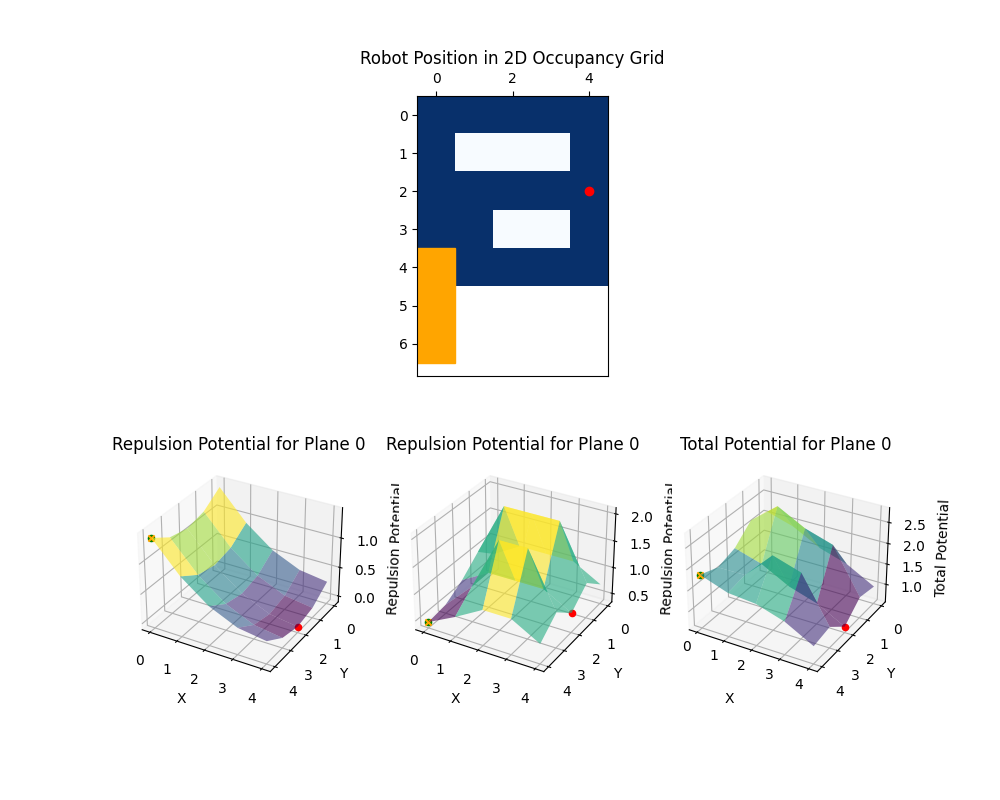

In [323]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt

occupancy_grid = generate_occupancy_grid()

current_position=(start_point[0], start_point[1], 0)

fig = plt.figure(figsize=(10, 8))
ax_occupancy_grid = fig.add_subplot(2, 3, 2)

plot_2d_occupancy_grid(
    cs_2d=occupancy_grid,
    start_point=start_point,
    goal_point=goal_point,
    path=[],
    current_position=current_position,
    robot_width=robot_width,
    robot_length=robot_length,
    cs_2d_plot_axis=ax_occupancy_grid
)


normalized_attraction_potential_occupancy_grid, repulsion_potential_occupancy_grid = compute_potential_field(
                                                                                        cs_plane=occupancy_grid,
                                                                                        goal=goal_point)

ax_attr_pot = fig.add_subplot(2, 3, 4, projection='3d')
plot_attraction_potential_3D(
    attraction_potential_plane=normalized_attraction_potential_occupancy_grid,
    start_point=start_point,
    goal_point=goal_point,
    path=[],
    current_position=current_position,
    attr_pot_plot_axis=ax_attr_pot)


ax_repul_pot = fig.add_subplot(2, 3, 5, projection='3d')
plot_repulsion_potential_3D(
    repulsion_potential_plane=repulsion_potential_occupancy_grid,
    start_point=start_point,
    goal_point=goal_point,
    path=[],
    current_position=current_position,
    repul_pot_plot_axis=ax_repul_pot)


total_potential_occupancy_grid = compute_total_potential(normalized_attraction_potential_occupancy_grid, repulsion_potential_occupancy_grid)


ax_total_pot = fig.add_subplot(2, 3, 6, projection='3d')
plot_total_potential_3D(
    total_potential_plane=total_potential_occupancy_grid,
    start_point=start_point,
    goal_point=goal_point,
    path=[],
    current_position=current_position,
    total_pot_plot_axis=ax_total_pot)

plt.show()


# Plot Computational Space 0° Rotation

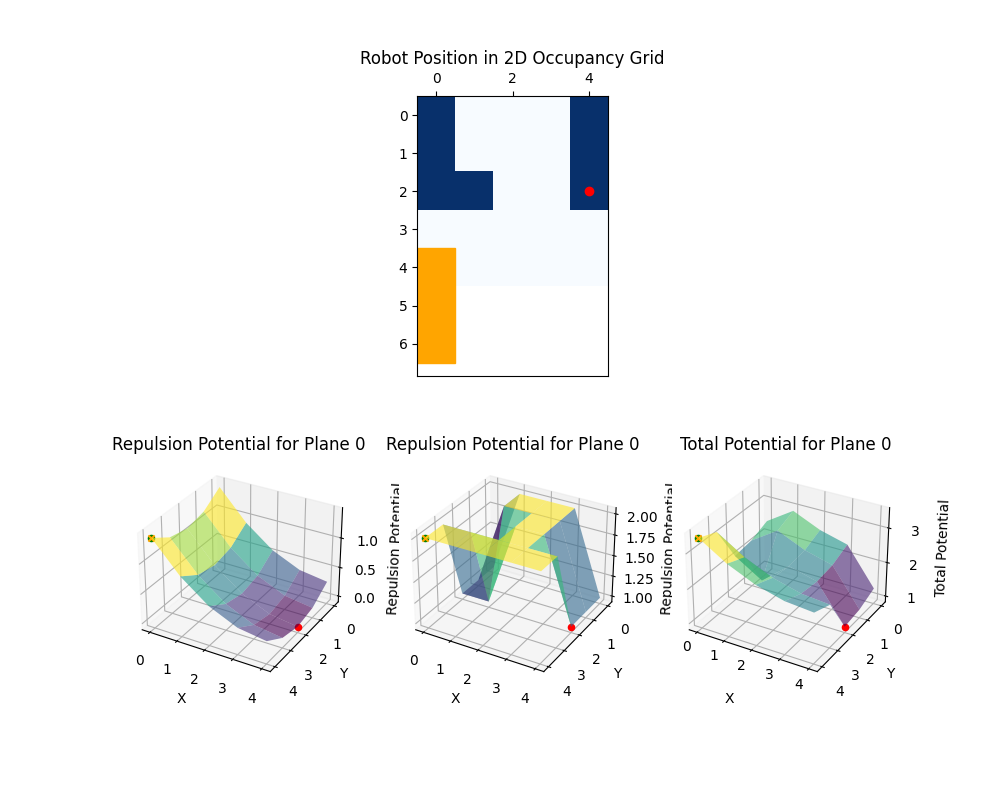

In [333]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt

computational_space_0deg_rotation = compute_cs_0deg(
    occupancy_grid=occupancy_grid,
    robot_width=robot_width,
    robot_length=robot_length)

current_position=(start_point[0], start_point[1], 0)

fig = plt.figure(figsize=(10, 8))
ax_computational_space_0deg_rotation = fig.add_subplot(2, 3, 2)

plot_2d_occupancy_grid(
    cs_2d=computational_space_0deg_rotation,
    start_point=start_point,
    goal_point=goal_point,
    path=[],
    current_position=current_position,
    robot_width=robot_width,
    robot_length=robot_length,
    cs_2d_plot_axis=ax_computational_space_0deg_rotation
)


normalized_attraction_potential_cs_0deg, repulsion_potential_cs_0deg = compute_potential_field(
                                                                                        cs_plane=computational_space_0deg_rotation,
                                                                                        goal=goal_point)

ax_attr_pot = fig.add_subplot(2, 3, 4, projection='3d')
plot_attraction_potential_3D(
    attraction_potential_plane=normalized_attraction_potential_cs_0deg,
    start_point=start_point,
    goal_point=goal_point,
    path=[],
    current_position=current_position,
    attr_pot_plot_axis=ax_attr_pot)


ax_repul_pot = fig.add_subplot(2, 3, 5, projection='3d')
plot_repulsion_potential_3D(
    repulsion_potential_plane=repulsion_potential_cs_0deg,
    start_point=start_point,
    goal_point=goal_point,
    path=[],
    current_position=current_position,
    repul_pot_plot_axis=ax_repul_pot)


total_potential_cs_0deg = compute_total_potential(normalized_attraction_potential_cs_0deg, repulsion_potential_cs_0deg)


ax_total_pot = fig.add_subplot(2, 3, 6, projection='3d')
plot_total_potential_3D(
    total_potential_plane=total_potential_cs_0deg,
    start_point=start_point,
    goal_point=goal_point,
    path=[],
    current_position=current_position,
    total_pot_plot_axis=ax_total_pot)

plt.show()


# Plot Computational Space 90° Rotation

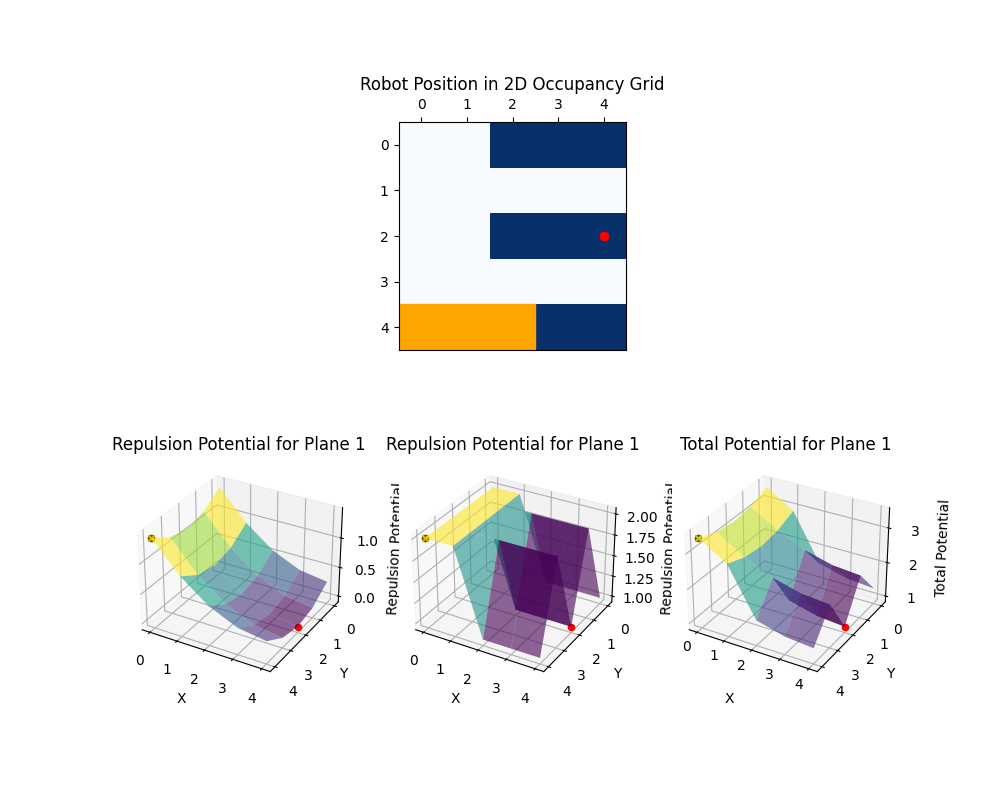

In [340]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt

computational_space_90deg_rotation = compute_cs_90deg(
    occupancy_grid=occupancy_grid,
    robot_width=robot_width,
    robot_length=robot_length)

current_position=(start_point[0], start_point[1], 1)

fig = plt.figure(figsize=(10, 8))
ax_computational_space_90deg_rotation = fig.add_subplot(2, 3, 2)

plot_2d_occupancy_grid(
    cs_2d=computational_space_90deg_rotation,
    start_point=start_point,
    goal_point=goal_point,
    path=[],
    current_position=current_position,
    robot_width=robot_width,
    robot_length=robot_length,
    cs_2d_plot_axis=ax_computational_space_90deg_rotation
)


normalized_attraction_potential_cs_90deg, repulsion_potential_cs_90deg = compute_potential_field(
                                                                                        cs_plane=computational_space_90deg_rotation,
                                                                                        goal=goal_point)

ax_attr_pot = fig.add_subplot(2, 3, 4, projection='3d')
plot_attraction_potential_3D(
    attraction_potential_plane=normalized_attraction_potential_cs_90deg,
    start_point=start_point,
    goal_point=goal_point,
    path=[],
    current_position=current_position,
    attr_pot_plot_axis=ax_attr_pot)


ax_repul_pot = fig.add_subplot(2, 3, 5, projection='3d')
plot_repulsion_potential_3D(
    repulsion_potential_plane=repulsion_potential_cs_90deg,
    start_point=start_point,
    goal_point=goal_point,
    path=[],
    current_position=current_position,
    repul_pot_plot_axis=ax_repul_pot)


total_potential_cs_90deg = compute_total_potential(normalized_attraction_potential_cs_90deg, repulsion_potential_cs_90deg)


ax_total_pot = fig.add_subplot(2, 3, 6, projection='3d')
plot_total_potential_3D(
    total_potential_plane=total_potential_cs_90deg,
    start_point=start_point,
    goal_point=goal_point,
    path=[],
    current_position=current_position,
    total_pot_plot_axis=ax_total_pot)

plt.show()


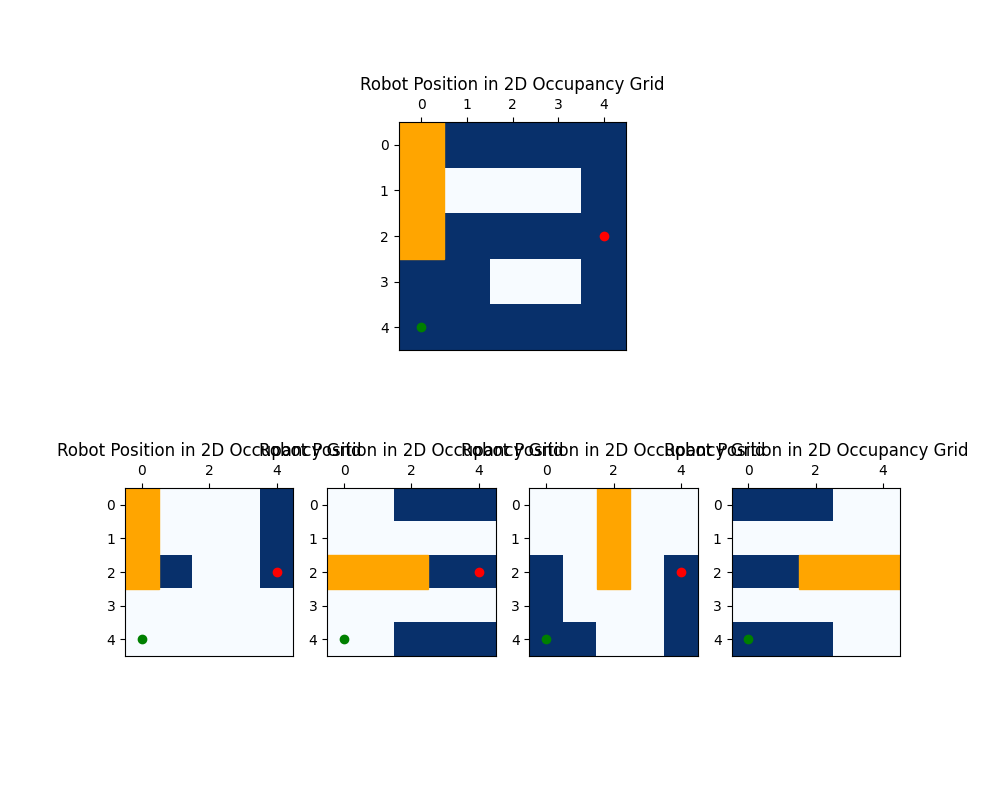

In [331]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

%matplotlib widget
#import ipywidgets as widgets
#from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

occupancy_grid = generate_occupancy_grid()


normalized_attraction_potential_occupancy_grid, repulsion_potential_occupancy_grid = compute_potential_field(
                                                                                        cs_plane=occupancy_grid,
                                                                                        goal=goal_point)

total_potential_occupancy_grid = compute_total_potential(normalized_attraction_potential_occupancy_grid, repulsion_potential_occupancy_grid)


current_position=(start_point[0], start_point[0], 0)

fig = plt.figure(figsize=(10, 8))
ax_occupancy_grid = fig.add_subplot(2, 3, 2)

plot_2d_occupancy_grid(
    cs_2d=occupancy_grid,
    start_point=start_point,
    goal_point=goal_point,
    path=[],
    current_position=current_position,
    robot_width=robot_width,
    robot_length=robot_length,
    cs_2d_plot_axis=ax_occupancy_grid
)

current_position=(start_point[0], start_point[0], 0)

comuptational_space_0deg_rotation = compute_cs_0deg(
    occupancy_grid=occupancy_grid, 
    robot_width=robot_width,
    robot_length=robot_length)

ax_occupancy_grid_0deg = fig.add_subplot(2, 4, 5)

plot_2d_occupancy_grid(
    cs_2d=comuptational_space_0deg_rotation,
    start_point=start_point,
    goal_point=goal_point,
    path=[],
    current_position=current_position,
    robot_width=robot_width,
    robot_length=robot_length,
    cs_2d_plot_axis=ax_occupancy_grid_0deg
)


current_position=(2,2,1)

comuptational_space_90deg_rotation = compute_cs_90deg(
    occupancy_grid=occupancy_grid, 
    robot_width=robot_width,
    robot_length=robot_length)

ax_occupancy_grid_90deg = fig.add_subplot(2, 4, 6)

plot_2d_occupancy_grid(
    cs_2d=comuptational_space_90deg_rotation,
    start_point=start_point,
    goal_point=goal_point,
    path=[],
    current_position=current_position,
    robot_width=robot_width,
    robot_length=robot_length,
    cs_2d_plot_axis=ax_occupancy_grid_90deg
)


current_position=(2,2,2)

comuptational_space_180deg_rotation = compute_cs_180deg(
    occupancy_grid=occupancy_grid, 
    robot_width=robot_width,
    robot_length=robot_length)

ax_occupancy_grid_180deg = fig.add_subplot(2, 4, 7)

plot_2d_occupancy_grid(
    cs_2d=comuptational_space_180deg_rotation,
    start_point=start_point,
    goal_point=goal_point,
    path=[],
    current_position=current_position,
    robot_width=robot_width,
    robot_length=robot_length,
    cs_2d_plot_axis=ax_occupancy_grid_180deg
)


current_position=(2,2,3)

comuptational_space_270deg_rotation = compute_cs_270deg(
    occupancy_grid=occupancy_grid, 
    robot_width=robot_width,
    robot_length=robot_length)

ax_occupancy_grid_270deg = fig.add_subplot(2, 4, 8)

plot_2d_occupancy_grid(
    cs_2d=comuptational_space_270deg_rotation,
    start_point=start_point,
    goal_point=goal_point,
    path=[],
    current_position=current_position,
    robot_width=robot_width,
    robot_length=robot_length,
    cs_2d_plot_axis=ax_occupancy_grid_270deg
)


# Potentiale erstellen
'''
attraction_potential, repulsion_potential = create_potential_field(hindernisparkour_complex_connected, start_point, goal_point)
total_potential = create_total_potential(attraction_potential, repulsion_potential)

current_position = start_point
path = [start_point]

# Erstelle Subplots
fig = plt.figure(figsize=(15, 12))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222, projection='3d')
ax3 = fig.add_subplot(223, projection='3d')
ax4 = fig.add_subplot(224, projection='3d')

plot_2d_and_3d_with_position(hindernisparkour_complex_connected, attraction_potential, repulsion_potential, total_potential, start_point, goal_point, path, current_position, ax1, ax2, ax3, ax4)

# Verbinde die Tasten mit der Funktion on_key
fig.canvas.mpl_connect('key_press_event', on_key)
'''

plt.show()
